In [9]:
# dy/dx=f(x) y(0)=0
#Developed a PINN using pytorch for a simple case

In [10]:
import numpy as np
import matplotlib.pyplot as plt

In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [12]:
import math
f_x_str = input("enter f(x): ")
def f_x(x):
    return eval(f"torch.{f_x_str}")

In [13]:
class Model(nn.Module):
    def __init__(self,input,output,h1):
        super().__init__()
        self.fc1=nn.Linear(input,h1)
        self.fc2=nn.Linear(h1,h1)
        self.fc3=nn.Linear(h1,output)
    def forward(self,x):
        x=F.tanh(self.fc1(x))
        x=F.tanh(self.fc2(x))
        x=self.fc3(x)
        return x
        

In [14]:
x = torch.linspace(0,torch.pi,100).reshape(-1,1).requires_grad_(True)
f_x1= f_x(x)


In [15]:
f_x1 = f_x(x).detach()


In [16]:
torch.manual_seed(14)
model=Model(1,1,40)
optimizer=torch.optim.Adam(model.parameters(),lr=1e-4)


In [17]:
epochs=24000
loss1_history=[]
loss2_history=[]
loss_history=[]
for i in range(epochs):
    optimizer.zero_grad()
    ypred1=model(torch.zeros((1,1)))
    loss1=1*torch.mean((ypred1-0)**2)
    ypred2=model(x)
    dy_dx = torch.autograd.grad(ypred2, x, torch.ones_like(ypred2), create_graph=True)[0]  
    loss2=1*torch.mean((dy_dx-f_x1)**2)
    loss=loss1+loss2
    loss.backward()
    optimizer.step()
    loss1_history.append(loss1.detach().numpy())
    loss2_history.append(loss2.detach().numpy())
    loss_history.append(loss.detach().numpy())

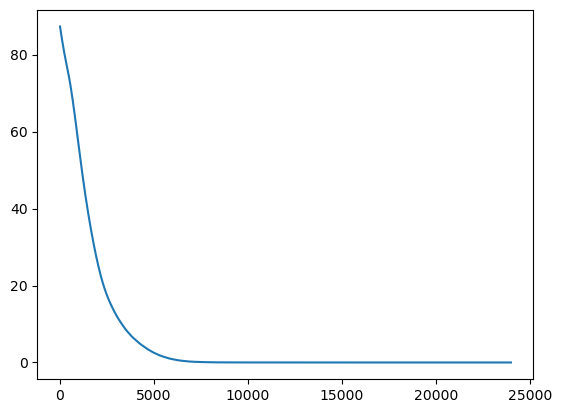

In [18]:
plt.plot(range(epochs),loss_history)


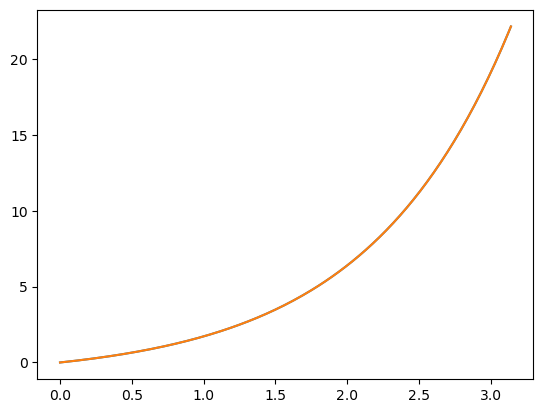

In [19]:
with torch.no_grad():
    x= np.linspace(0,np.pi,200).reshape(-1, 1)  
    y= (np.exp(x))-1
    plt.plot(x,y)
    x=torch.FloatTensor(x)
    ypred=model.forward(x)
    plt.plot(x,ypred)